# Lesson 1

In [3]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [17]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Pandas version 0.23.4
Matplotlib version 3.0.2


In [5]:
# The inital set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [6]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [7]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [8]:
df.to_csv('births1880.csv',index=False,header=False)

In [9]:
Location = r'/home/mark/Documents/Python/births1880.csv'
df = pd.read_csv(Location)

In [10]:
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [11]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [12]:
df = pd.read_csv(Location, names=['Names','Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [13]:
import os
os.remove(Location)

In [16]:
df.dtypes

Names     object
Births     int64
dtype: object

In [17]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [18]:
df['Births'].max()

973

The most popular name


,Names,Births
4,Mel,973


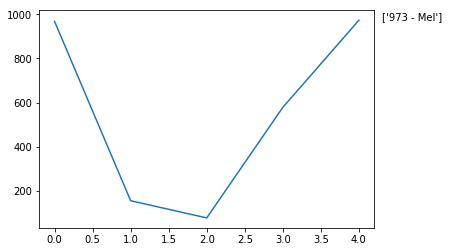

In [27]:
#Create graph
df['Births'].plot()

# Maximum Value in the Data Set
MaxValue = df['Births'].max()

# Name associate with maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
print("The most popular name")
df[df['Births'] == df['Births'].max()]

#Sorted.head(1) can also be used

# Lesson 2

In [6]:
# Initial Set of Baby Names
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']

In [7]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [8]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]
# print first 10 
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [10]:
# random number of births per name for year 1880
births = [random.randint(low=0, high=1000) for i in range(1000)]
births[:10]

[905, 52, 796, 217, 874, 161, 605, 230, 593, 464]

In [11]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 905),
 ('Jessica', 52),
 ('Jessica', 796),
 ('Bob', 217),
 ('Jessica', 874),
 ('Jessica', 161),
 ('Jessica', 605),
 ('Mary', 230),
 ('Mary', 593),
 ('Mary', 464)]

In [12]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,905
1,Jessica,52
2,Jessica,796
3,Bob,217
4,Jessica,874
5,Jessica,161
6,Jessica,605
7,Mary,230
8,Mary,593
9,Mary,464


In [13]:
df.to_csv('births1880.txt', index=False, header=False)

In [14]:
Location = r'/home/mark/Documents/Python/births1880.txt'
df = pd.read_csv(Location)

In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Mary    999 non-null object
905     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


,Mary,905
0,Jessica,52
1,Jessica,796
2,Bob,217
3,Jessica,874
4,Jessica,161


In [16]:
df = pd.read_csv(Location, header = None)

In [17]:
df.tail()

,0,1
995,John,875
996,Jessica,878
997,John,46
998,Jessica,657
999,John,87


In [18]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,905
1,Jessica,52
2,Jessica,796
3,Bob,217
4,Jessica,874


In [19]:
import os
os.remove(Location)

In [20]:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [32]:
# Print unique values
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [30]:
# MEthod 2
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [34]:
# create groupby object
name = df.groupby('Names')

# apply sum function
df = name.sum()
df

,Births
Names,
Bob,98759
Jessica,96622
John,98353
Mary,94866
Mel,104818


In [35]:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Mel,104818


In [36]:
df['Births'].max()

104818

The most popular name


,Births
Names,
Mel,104818
Bob,98759
John,98353
Jessica,96622
Mary,94866


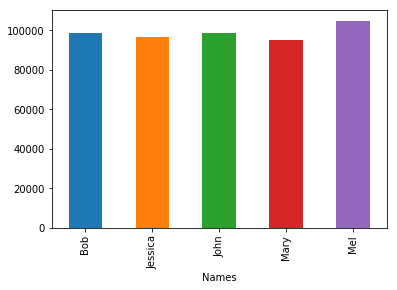

In [38]:
# Create graph
df['Births'].plot.bar()

print('The most popular name')
df.sort_values(by='Births', ascending=False)

# Lesson 3

In [1]:
# inport libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)


Python version 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Pandas version: 0.23.4
Matplotlib version 3.0.2


In [5]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

In [6]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset,columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [7]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


# Lesson 3

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

In [9]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
Pandas version 0.23.4
Matplotlib version 3.0.2


In [10]:
# set seed
np.seed(111)

# function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output



In [11]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [12]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [13]:
# save results to excel
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


In [18]:
# Location of the file
Location = r'/home/mark/Documents/Python/Lesson3.xlsx'

# Parse a specific element
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [19]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [20]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


In [21]:
## Prepare Data
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [22]:
## CLean State Column convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())

In [23]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [24]:
# only grab where Status == 1
mask = df['Status'] == 1
df = df[mask]

In [25]:
## Convert NJ to NY
mask = df.State == 'NJ'
df['State'][mask]= 'NY'

In [26]:
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

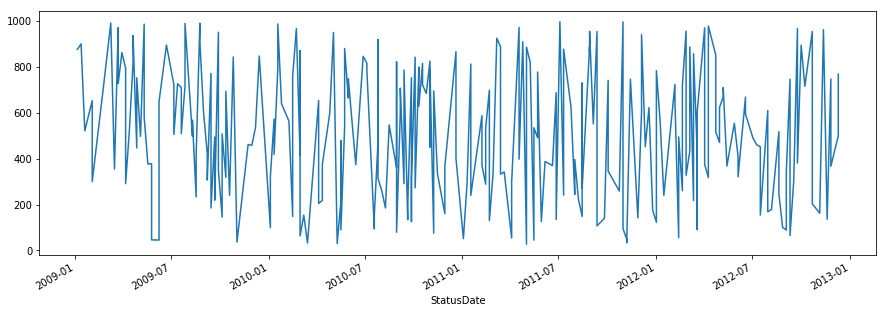

In [28]:
df['CustomerCount'].plot(figsize=(15,5))

In [29]:
sortdf = df[df['State'] == 'NY'].sort_index(axis=0)
sortdf.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728


In [30]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['State', 'StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

In [31]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [32]:
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-02-1

In [33]:
# select the StatusDate index
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [34]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name='StatusDate', length=161, freq=None)

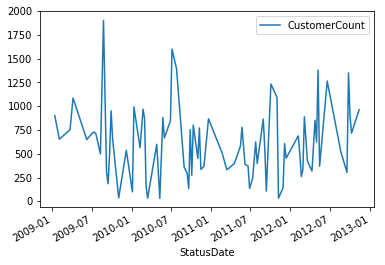

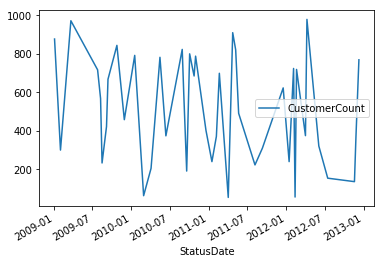

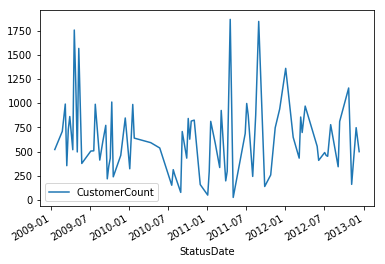

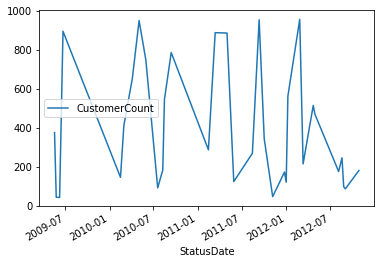

In [35]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

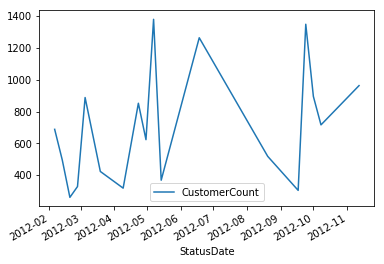

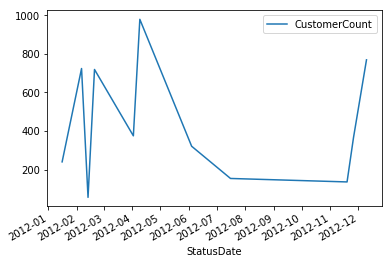

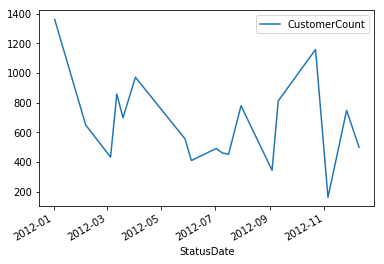

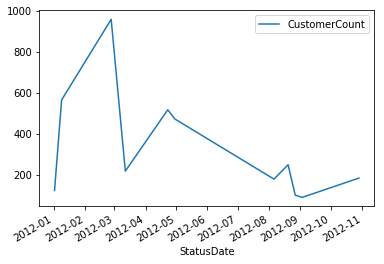

In [37]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

In [38]:
# Calculate Outliers
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) ) 
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper'])

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]


In [39]:
Daily.head()

CustomerCount  Lower   Upper  Outlier
State StatusDate                                       
FL    2009-01-12            901  450.5  1351.5    False
      2009-02-02            653  326.5   979.5    False
      2009-03-23            752  376.0  1128.0    False
      2009-04-06           1086  543.0  1629.0    False
      2009-06-08            649  324.5   973.5    False

In [41]:
# Combine all markets

# GEt the max customer count by Date

ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by year and month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# what is the max customer count per year and month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


In [44]:
# Create the Big Hairy Annual Goal (BHAG) dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG


,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [45]:
# Combining the BHAG and the ALL data set
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

/home/mark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,BHAG,CustomerCount,Max
2012-11-19,NaN,136.0,1115.0
2012-11-26,NaN,1115.0,1115.0
2012-12-10,NaN,1269.0,1269.0
2012-12-31,2000.0,NaN,NaN
2013-12-31,3000.0,NaN,NaN


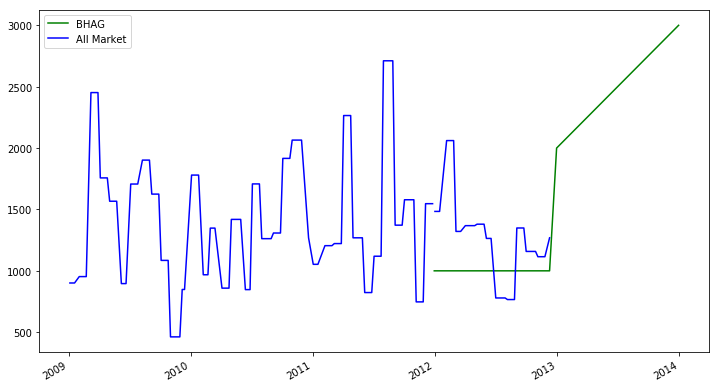

In [49]:
fig, axes = plt.subplots(figsize=(12,7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Market')
plt.legend(loc='best')

In [50]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustomerCount,Max
2009,NaN,2452.0,2452.0
2010,NaN,2065.0,2065.0
2011,1000.0,2711.0,2711.0
2012,2000.0,2061.0,2061.0
2013,3000.0,NaN,NaN


In [51]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,2452.0,2452.0,NaN
2010,NaN,2065.0,2065.0,-0.157830
2011,1000.0,2711.0,2711.0,0.312833
2012,2000.0,2061.0,2061.0,-0.239764
2013,3000.0,NaN,NaN,0.000000


In [54]:
(1 + Year.loc[2012,'YR_PCT_Change']) * Year.loc[2012,'Max']

1566.8465510881595

Text(0.5, 1.0, 'North East')

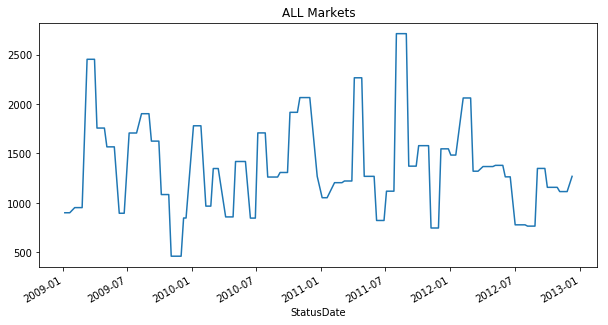

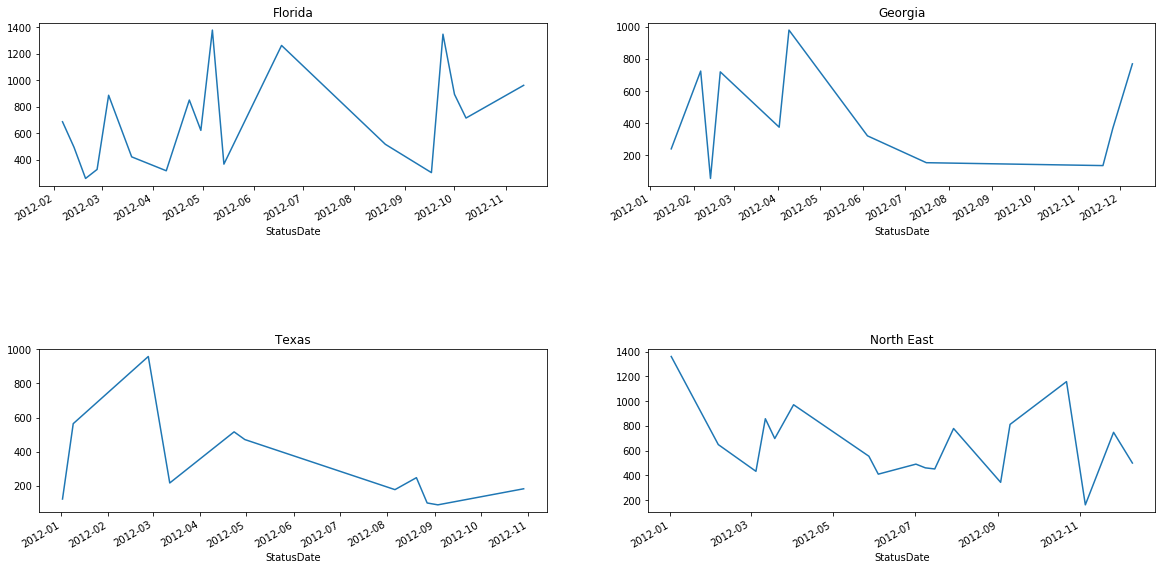

In [58]:
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

#Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
fig.subplots_adjust(hspace=1.0) ## create space between plots

Daily.loc['FL']['CustomerCount']['2012'].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012'].fillna(method='pad').plot(ax=axes[0,1])
Daily.loc['TX']['CustomerCount']['2012'].fillna(method='pad').plot(ax=axes[1,0])
Daily.loc['NY']['CustomerCount']['2012'].fillna(method='pad').plot(ax=axes[1,1])

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East')
